In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
from sklearn.preprocessing import StandardScaler

In [8]:
df = pd.read_excel('unconv_MV_v5.xlsx')
df

,Well,Por,Perm,AI,Brittle,TOC,VR,Prod
0,1,12.08,2.92,2.80,81.40,1.16,2.31,4165.196191
1,2,12.38,3.53,3.22,46.17,0.89,1.88,3561.146205
2,3,14.02,2.59,4.01,72.80,0.89,2.72,4284.348574
3,4,17.67,6.75,2.63,39.81,1.08,1.88,5098.680869
4,5,17.52,4.57,3.18,10.94,1.51,1.90,3406.132832
...,...,...,...,...,...,...,...,...
195,196,11.95,3.13,2.97,67.18,0.80,2.06,3847.571003
196,197,17.99,9.87,3.38,44.32,0.98,2.08,5601.227131
197,198,12.12,2.27,3.52,57.07,-0.04,1.73,3409.575363
198,199,15.55,4.48,2.48,58.25,1.89,2.35,5087.592149


In [9]:
df.describe()

,Well,Por,Perm,AI,Brittle,TOC,VR,Prod
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,14.991150,4.330750,2.968850,48.161950,0.990450,1.964300,4311.219852
std,57.879185,2.971176,1.731014,0.566885,14.129455,0.481588,0.300827,992.038414
min,1.000000,6.550000,1.130000,1.280000,10.940000,-0.190000,0.930000,2107.139414
25%,50.750000,12.912500,3.122500,2.547500,37.755000,0.617500,1.770000,3618.064513
50%,100.500000,15.070000,4.035000,2.955000,49.510000,1.030000,1.960000,4284.687348
75%,150.250000,17.402500,5.287500,3.345000,58.262500,1.350000,2.142500,5086.089761
max,200.000000,23.550000,9.870000,4.630000,84.330000,2.180000,2.870000,6662.622385


,Well,Por,Perm,AI,Brittle,TOC,VR,Prod
Well,1.000000,0.068927,0.077928,0.041483,-0.079252,0.022624,-0.007279,0.026817
Por,0.068927,1.000000,0.760546,-0.461549,-0.218570,0.711831,0.111860,0.861910
Perm,0.077928,0.760546,1.000000,-0.239636,-0.124017,0.471746,0.051023,0.727426
AI,0.041483,-0.461549,-0.239636,1.000000,0.127599,-0.531864,0.499143,-0.390835
Brittle,-0.079252,-0.218570,-0.124017,0.127599,1.000000,-0.214282,0.317929,0.237155
TOC,0.022624,0.711831,0.471746,-0.531864,-0.214282,1.000000,0.299483,0.654445
VR,-0.007279,0.111860,0.051023,0.499143,0.317929,0.299483,1.000000,0.323182
Prod,0.026817,0.861910,0.727426,-0.390835,0.237155,0.654445,0.323182,1.000000


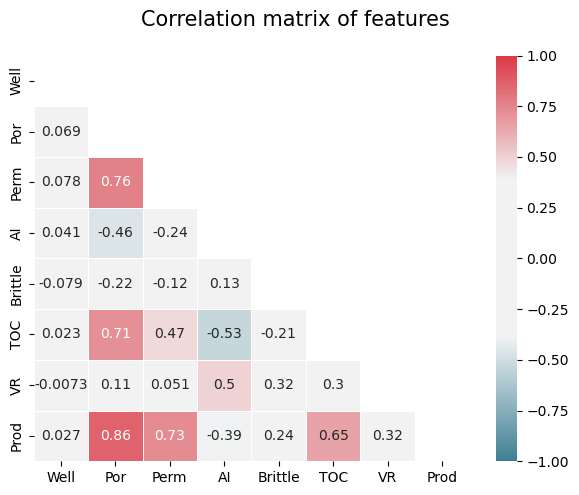

In [16]:
corrmat = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corrmat, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(6, 5))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True, sep=100)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corrmat, annot=True, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0, linewidths=.5)

fig.suptitle('Correlation matrix of features', fontsize=15)
fig.tight_layout()

corrmat

In [20]:
features = ['Por', 'Perm', 'AI', 'Brittle', 'TOC', 'VR']
target = ['Prod']

X = df[features]
y = df[target].values

In [22]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
# y does not have to be standardized

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.2, random_state=5)

In [27]:
from sklearn.linear_model import Ridge

In [29]:
ridge_model = Ridge(alpha=1e-1, copy_X=True, fit_intercept=True, random_state=5)

In [31]:
ridge_model.fit(X_train, y_train)

Ridge(alpha=0.1, random_state=5)

In [33]:
ridge_model.intercept_

array([4307.68830257])

In [32]:
ridge_model.coef_

array([[ 674.68237188,  194.47008846, -197.44428432,  344.25645435,
         -38.50404324,  247.06734932]])

In [34]:
ridge_model.n_features_in_

6

In [35]:
ridge_model.score(X_train, y_train)

0.9570501132354317

In [36]:
ridge_model.score(X_test, y_test)

0.9676550065825477

In [37]:
n_alphas = 200
alphas = np.logspace(-3, 6, n_alphas)

In [55]:
coefs = []
scores = []
for a in alphas:
    ridge = Ridge(alpha=a, fit_intercept=True)
    ridge.fit(X_train, y_train)
    coefs.append(ridge.coef_[0])
    scores.append(ridge.score(X_test, y_test))

In [42]:
alphas.shape

(200,)

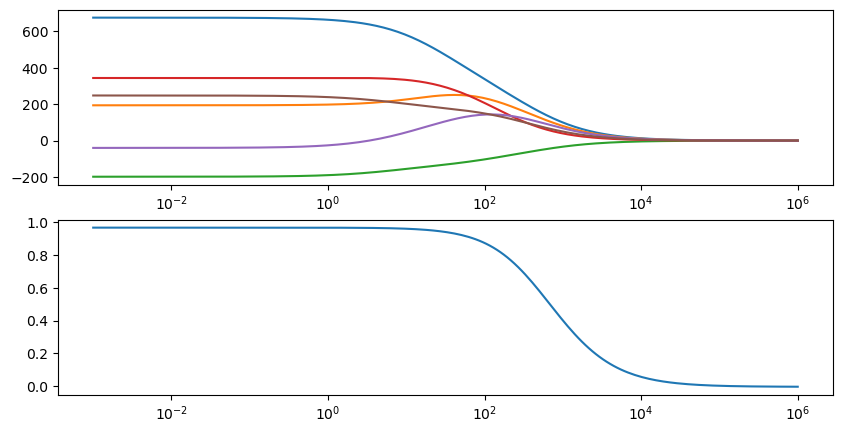

In [59]:
fig, ax = plt.subplots(2,1,figsize=(10, 5))

ax[0].plot(alphas, coefs)
ax[0].set_xscale('log')
ax[1].plot(alphas, scores)
ax[1].set_xscale('log')

In [69]:
from sklearn.linear_model import RidgeCV, Lasso, LassoCV

In [62]:
lasso_model = Lasso(alpha=1e-1, copy_X=True, fit_intercept=True, random_state=5)

In [63]:
lasso_model.fit(X_train, y_train)

Lasso(alpha=0.1, random_state=5)

In [64]:
lasso_model.coef_

array([ 675.94512991,  193.63798674, -196.61132479,  344.75496031,
        -38.17313163,  246.33832545])

In [66]:
lasso_model.intercept_

array([4307.64702104])

In [68]:
lasso_model.score(X_test, y_test)

0.9676801619472273

In [72]:
lassoCV_model = LassoCV(alphas=[100,10,1,0.1,0.01], cv=10, fit_intercept=True, copy_X=True, random_state=5)

In [75]:
lassoCV_model.fit(X_std, y)

c:\Users\Optimal\anaconda3\envs\env0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1568: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LassoCV(alphas=[100, 10, 1, 0.1, 0.01], cv=10, random_state=5)

In [76]:
lassoCV_model.score(X_std, y)

0.9598420876617894

In [77]:
lassoCV_model.mse_path_

array([[ 56523.3821517 ,  91778.01022539,  98644.69946336,
         59057.29278016,  56840.95086667, 102437.55819541,
        106804.29673937,  79829.34105403,  96503.75656575,
         75913.20691776],
       [ 57027.60310052,  29607.17861147,  29563.4691651 ,
         19333.78003362,  57408.15428916,  59055.94975314,
         70230.41090044,  30651.29915061,  33780.21147589,
         56593.52672257],
       [ 60033.39890446,  26585.01173046,  27427.83876281,
         18019.42595136,  57260.82224169,  56991.55094473,
         68331.23956678,  29354.97097212,  37120.62845023,
         57446.10715634],
       [ 60414.19264056,  25881.48421937,  27754.8070811 ,
         17865.84406011,  56409.56139842,  57105.82229944,
         67573.57116104,  28864.00735783,  38525.24974874,
         57182.20811179],
       [ 60460.64579265,  25815.56602041,  27790.55674817,
         17855.46806381,  56322.19028294,  57123.51270978,
         67502.42198991,  28819.76714362,  38674.51563273,
         57

In [78]:
lassoCV_model.alphas_

array([1.e+02, 1.e+01, 1.e+00, 1.e-01, 1.e-02])

In [79]:
lassoCV_model.alpha_

0.01

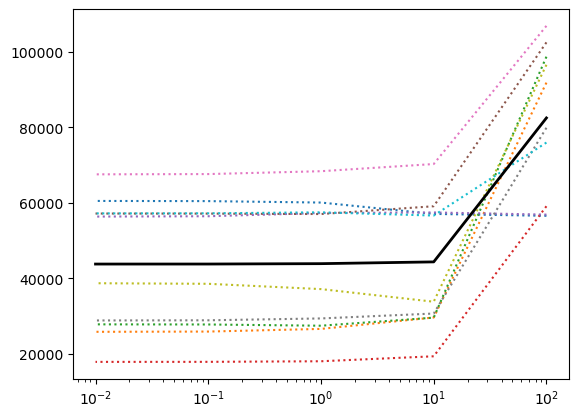

In [80]:
fig, ax = plt.subplots()
ax.semilogx(lassoCV_model.alphas_, lassoCV_model.mse_path_, ':')
ax.plot(lassoCV_model.alphas_, lassoCV_model.mse_path_.mean(axis=-1), color='k', label='Average across the folds', linewidth=2)

In [83]:
from sklearn.linear_model import ElasticNet, ElasticNetCV, lasso_path, enet_path

In [82]:
ene_model = ElasticNet(alpha=1e-1, l1_ratio=0.5, fit_intercept=True, copy_X=True, random_state=5)

In [84]:
ene_model.fit(X_train, y_train)

ElasticNet(alpha=0.1, random_state=5)